# Annual Financial Analysis

Este arquivo, 'Annual Financial Analysis 2023', serve como um espaço dedicado à análise de uma planilha que compila alguns dados sobre meus gastos ao longo do ano. Em 2023, especialmente a partir de fevereiro, registrei cuidadosamente minhas despesas com o objetivo de desenvolver consciência e hábitos de gestão financeira em minha vida pessoal. A proposta aqui é praticar e aplicar conceitos de análise de dados relacionados à gestão financeira, visando a obtenção de insights significativos para embasar decisões financeiras futuras.

## DATASET

In [1]:
# importando os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('GANHOS E GASTOS 2023.csv')
df.head()

,Timestamp,MÊS,ITEM,CATEGORIA,VALOR,O GASTO FOI URGENTE?,FORMA DE PAGAMENTO,GANHO
0,12/26/2023 11:32:12,FEV,passagens,TRANSPORTE,30.0,SIM,DÉBITO,360.0
1,12/26/2023 11:33:26,FEV,cabeleireiro,BEM ESTAR,20.0,NÃO,PIX,50.0
2,12/26/2023 11:34:32,FEV,ingresso pra woman Tech,NECESSÁRIO,50.0,FOI PARA MEU BEM ESTAR,DÉBITO,80.0
3,12/26/2023 11:35:28,FEV,uber,TRANSPORTE,10.0,NÃO,DÉBITO,100.0
4,12/26/2023 11:35:55,FEV,convite de manu,BEM ESTAR,33.0,NÃO,DÉBITO,NaN


De inicio, vamos realizar algumas operações de mapeamento de valores no Data Frame. <br>

Neste trecho, está sendo criado um dicionário 'months' que mapeia abreviações de meses para números. Portanto, originalmente a coluna 'MÊS' contém valores como 'JAN', 'FEV', 'MAR', etc., após essa operação, esses valores serão substituídos pelos respectivos números de 1 a 12.

In [3]:
months = {'JAN': 1, 'FEV': 2, 'MAR': 3, 'ABR': 4, 'MAIO': 5, 'JUN': 6, 'JUL': 7, 'AGO': 8, 'SET': 9, 'OUT': 10, 'NOV': 11, 'DEZ': 12}

df['MÊS'] = df['MÊS'].map(months)
df

,Timestamp,MÊS,ITEM,CATEGORIA,VALOR,O GASTO FOI URGENTE?,FORMA DE PAGAMENTO,GANHO
0,12/26/2023 11:32:12,2,passagens,TRANSPORTE,30.0,SIM,DÉBITO,360.0
1,12/26/2023 11:33:26,2,cabeleireiro,BEM ESTAR,20.0,NÃO,PIX,50.0
2,12/26/2023 11:34:32,2,ingresso pra woman Tech,NECESSÁRIO,50.0,FOI PARA MEU BEM ESTAR,DÉBITO,80.0
3,12/26/2023 11:35:28,2,uber,TRANSPORTE,10.0,NÃO,DÉBITO,100.0
4,12/26/2023 11:35:55,2,convite de manu,BEM ESTAR,33.0,NÃO,DÉBITO,NaN
...,...,...,...,...,...,...,...,...
297,1/1/2024 12:09:55,12,barco,DESNECESSARIO,95.2,NÃO,CRÉDITO,NaN
298,1/1/2024 12:10:17,12,magazine,BEM ESTAR,25.0,NÃO,CRÉDITO,NaN
299,1/1/2024 12:10:33,12,uber,TRANSPORTE,34.0,NÃO,CRÉDITO,NaN
300,1/1/2024 12:10:52,12,roupa,NECESSÁRIO,5.0,NÃO,CRÉDITO,NaN


Aqui, um dicionário 'yes_or_no' é criado para mapear as strings 'SIM' e 'NÃO' para os valores numéricos 1 e 0, respectivamente. A coluna 'O GASTO FOI URGENTE?' do DataFrame df é então mapeada usando esse dicionário.

In [4]:
yes_ou_no = {'SIM': 1, 'NÃO': 0}

df['O GASTO FOI URGENTE?'] = df['O GASTO FOI URGENTE?'].map(yes_ou_no)
df

,Timestamp,MÊS,ITEM,CATEGORIA,VALOR,O GASTO FOI URGENTE?,FORMA DE PAGAMENTO,GANHO
0,12/26/2023 11:32:12,2,passagens,TRANSPORTE,30.0,1.0,DÉBITO,360.0
1,12/26/2023 11:33:26,2,cabeleireiro,BEM ESTAR,20.0,0.0,PIX,50.0
2,12/26/2023 11:34:32,2,ingresso pra woman Tech,NECESSÁRIO,50.0,NaN,DÉBITO,80.0
3,12/26/2023 11:35:28,2,uber,TRANSPORTE,10.0,0.0,DÉBITO,100.0
4,12/26/2023 11:35:55,2,convite de manu,BEM ESTAR,33.0,0.0,DÉBITO,NaN
...,...,...,...,...,...,...,...,...
297,1/1/2024 12:09:55,12,barco,DESNECESSARIO,95.2,0.0,CRÉDITO,NaN
298,1/1/2024 12:10:17,12,magazine,BEM ESTAR,25.0,0.0,CRÉDITO,NaN
299,1/1/2024 12:10:33,12,uber,TRANSPORTE,34.0,0.0,CRÉDITO,NaN
300,1/1/2024 12:10:52,12,roupa,NECESSÁRIO,5.0,0.0,CRÉDITO,NaN


Abaixo, o trecho de código remove permanentemente a coluna 'ITEM' do DataFrame df uma vez que ela não acrescenta nenhuma informação importante para a analíse sugerida. Em seguida, atribui o DataFrame modificado de volta à variável df.

In [5]:
df = df.drop('ITEM', axis=1)
df

,Timestamp,MÊS,CATEGORIA,VALOR,O GASTO FOI URGENTE?,FORMA DE PAGAMENTO,GANHO
0,12/26/2023 11:32:12,2,TRANSPORTE,30.0,1.0,DÉBITO,360.0
1,12/26/2023 11:33:26,2,BEM ESTAR,20.0,0.0,PIX,50.0
2,12/26/2023 11:34:32,2,NECESSÁRIO,50.0,NaN,DÉBITO,80.0
3,12/26/2023 11:35:28,2,TRANSPORTE,10.0,0.0,DÉBITO,100.0
4,12/26/2023 11:35:55,2,BEM ESTAR,33.0,0.0,DÉBITO,NaN
...,...,...,...,...,...,...,...
297,1/1/2024 12:09:55,12,DESNECESSARIO,95.2,0.0,CRÉDITO,NaN
298,1/1/2024 12:10:17,12,BEM ESTAR,25.0,0.0,CRÉDITO,NaN
299,1/1/2024 12:10:33,12,TRANSPORTE,34.0,0.0,CRÉDITO,NaN
300,1/1/2024 12:10:52,12,NECESSÁRIO,5.0,0.0,CRÉDITO,NaN


## Análise Exploratória Inicial

In [6]:
df.dtypes

Timestamp                object
MÊS                       int64
CATEGORIA                object
VALOR                   float64
O GASTO FOI URGENTE?    float64
FORMA DE PAGAMENTO       object
GANHO                   float64
dtype: object

In [7]:
df2 = df[['VALOR','GANHO']]
df2.describe()

,VALOR,GANHO
count,302.000000,61.000000
mean,36.875695,190.874754
std,63.785066,236.193075
min,1.500000,4.000000
25%,10.000000,30.000000
50%,24.910000,50.000000
75%,40.000000,360.000000
max,860.000000,700.000000


In [8]:
mean = df2.mean(numeric_only = True)
median = df2.median(numeric_only = True)


dfmm = pd.DataFrame([mean, median], index = ["Mean", "Median"])

dfmm.T

,Mean,Median
VALOR,36.875695,24.91
GANHO,190.874754,50.00


In [9]:
var = df.var(numeric_only = True)
std = df.std(numeric_only = True)

ind = df.columns
dfvd = pd.DataFrame([var, std], index = ["Variância", "Desvio padrão"])

dfvd.T

,Variância,Desvio padrão
MÊS,10.110196,3.179653
VALOR,4068.534619,63.785066
O GASTO FOI URGENTE?,0.192319,0.438542
GANHO,55787.168879,236.193075


In [10]:
df.isnull().sum()

Timestamp                 0
MÊS                       0
CATEGORIA                 0
VALOR                     0
O GASTO FOI URGENTE?     58
FORMA DE PAGAMENTO        0
GANHO                   241
dtype: int64

In [11]:
print("\nVALORES ÚNICOS:\n")
print(df.nunique().sort_values())


VALORES ÚNICOS:

O GASTO FOI URGENTE?      2
FORMA DE PAGAMENTO        4
CATEGORIA                 7
MÊS                      11
GANHO                    25
VALOR                    97
Timestamp               302
dtype: int64


## Correlacionado Dados

#### VALOR (do gasto) por MÊS

In [12]:
ganho_por_mes = df[df['VALOR'].notnull()].groupby('MÊS')['VALOR'].sum().reset_index()

result1 = pd.DataFrame(ganho_por_mes)
result1

,MÊS,VALOR
0,2,587.00
1,3,570.50
2,4,754.70
3,5,849.00
4,6,862.30
5,7,1767.41
6,8,473.00
7,9,1504.00
8,10,715.03
9,11,1225.30


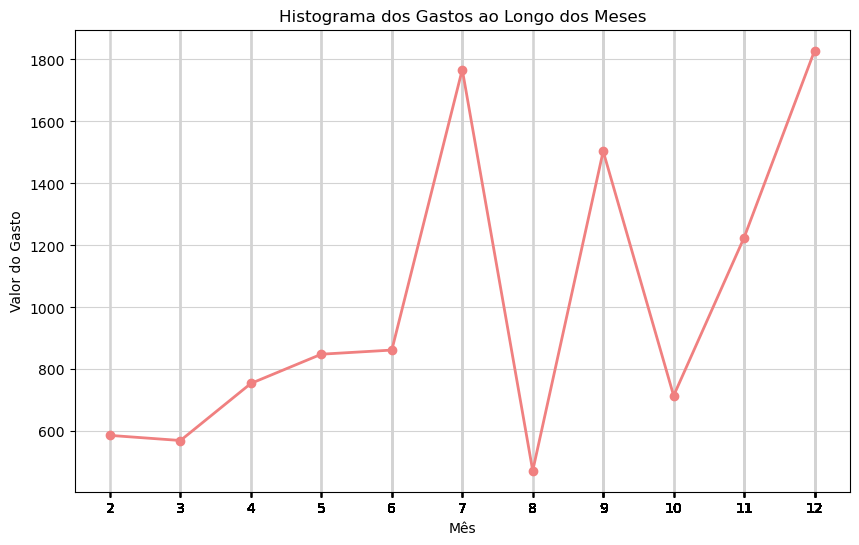

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(result1['MÊS'], result1['VALOR'], marker='o', color='lightcoral', linestyle='-', linewidth=2)

plt.title('Histograma dos Gastos ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Valor do Gasto')
plt.grid(color = 'lightgray')

plt.xticks(df['MÊS'])
plt.show()

#### (Valor do) GANHO por MÊS

In [14]:
gastos_por_mes = df[df['GANHO'].notnull()].groupby('MÊS')['GANHO'].sum().reset_index()

result2 = pd.DataFrame(gastos_por_mes)
result2

,MÊS,GANHO
0,2,590.00
1,3,835.00
2,4,1005.00
3,5,813.00
4,6,882.00
5,7,811.00
6,8,703.00
7,9,1460.00
8,10,1441.00
9,11,1392.00


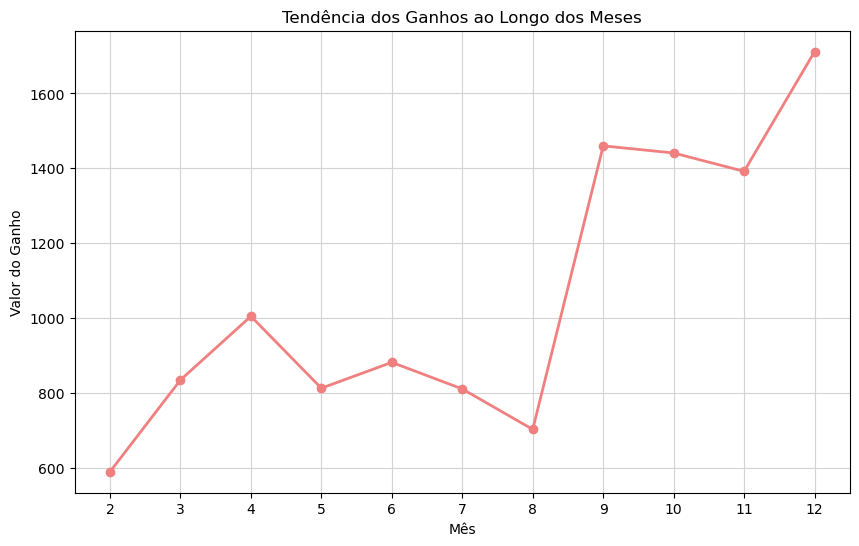

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(result2['MÊS'], result2['GANHO'], marker='o', color='lightcoral', linestyle='-', linewidth=2)

plt.title('Tendência dos Ganhos ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Valor do Ganho')
plt.grid(color='lightgray')

plt.xticks(result2['MÊS'])
plt.show()

#### VALOR (dos gastos) em relação a CATEGORIA

In [16]:
gastos_por_cat = df[df['CATEGORIA'].notnull()].groupby('CATEGORIA')['VALOR'].sum().reset_index()

result3 = pd.DataFrame(gastos_por_cat)
result3

,CATEGORIA,VALOR
0,BEM ESTAR,2523.40
1,COMIDA,1504.25
2,DESNECESSARIO,1379.26
3,DINHEIRO,4.00
4,FACULDADE,365.90
5,NECESSÁRIO,3575.50
6,TRANSPORTE,1784.15


In [17]:
#excluindo a linha com index 3, erro do data set.
data = result3.drop(index=3)

data['%'] = (data['VALOR'] / data['VALOR'].sum()) * 100
data

,CATEGORIA,VALOR,%
0,BEM ESTAR,2523.40,22.667048
1,COMIDA,1504.25,13.512287
2,DESNECESSARIO,1379.26,12.389535
4,FACULDADE,365.90,3.286785
5,NECESSÁRIO,3575.50,32.117789
6,TRANSPORTE,1784.15,16.026557


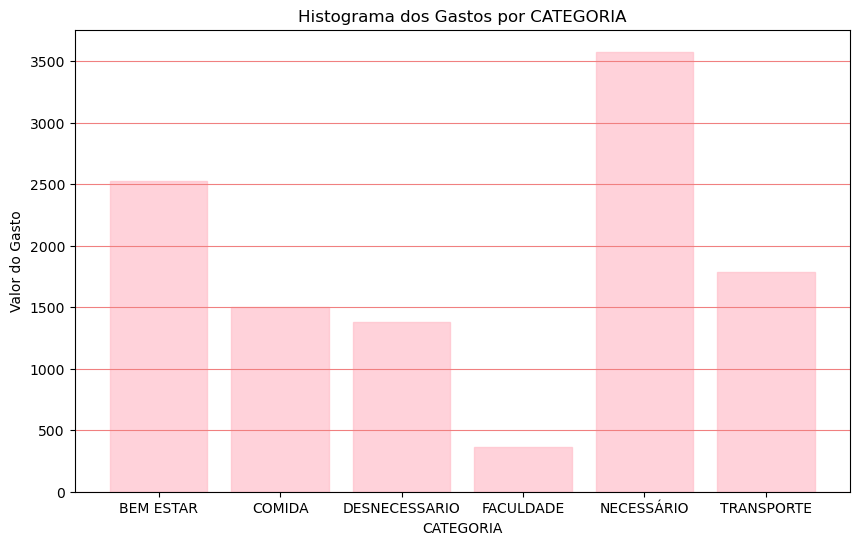

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(data['CATEGORIA'], data['VALOR'], color='pink', edgecolor='pink', alpha=0.7)

plt.title('Histograma dos Gastos por CATEGORIA')
plt.xlabel('CATEGORIA')
plt.ylabel('Valor do Gasto')
plt.grid(axis='y', color = 'lightcoral')

plt.xticks(data['CATEGORIA'])
plt.show()

#### GASTO por FORMA DE PAGAMENTO

In [19]:
gastos_por_for = df[df['VALOR'].notnull()].groupby('FORMA DE PAGAMENTO')['VALOR'].sum().reset_index()

result4 = pd.DataFrame(gastos_por_for)
result4

,FORMA DE PAGAMENTO,VALOR
0,CRÉDITO,587.40
1,DINHEIRO,501.70
2,DÉBITO,4549.61
3,PIX,5497.75


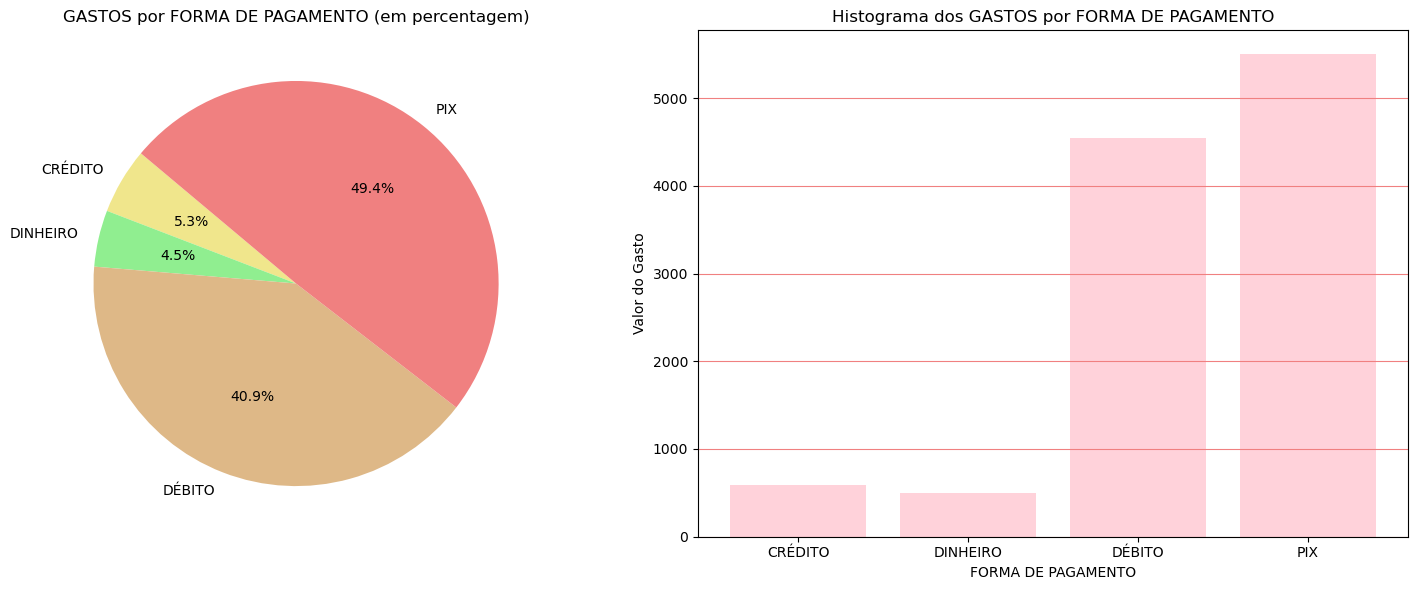

In [20]:
#gráfico de pizza
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.pie(result4['VALOR'], labels=result4['FORMA DE PAGAMENTO'], colors=['khaki', 'lightgreen', 'burlywood', 'lightcoral'], autopct='%1.1f%%', startangle=140)
plt.title('GASTOS por FORMA DE PAGAMENTO (em percentagem)')

#gráfico de barras
plt.subplot(1, 2, 2)
plt.bar(result4['FORMA DE PAGAMENTO'], result4['VALOR'], color='pink', alpha=0.7)
plt.title('Histograma dos GASTOS por FORMA DE PAGAMENTO')
plt.xlabel('FORMA DE PAGAMENTO')
plt.ylabel('Valor do Gasto')
plt.grid(axis='y', color='lightcoral')

plt.tight_layout()
plt.show()

## Análise Mensal

Agrupando os dados por mês e calculando o total de gastos e ganhos em cada mês.

In [21]:
group = df.groupby('MÊS').agg({'VALOR': 'sum', 'GANHO': 'sum'}).reset_index()
group

,MÊS,VALOR,GANHO
0,2,587.00,590.00
1,3,570.50,835.00
2,4,754.70,1005.00
3,5,849.00,813.00
4,6,862.30,882.00
5,7,1767.41,811.00
6,8,473.00,703.00
7,9,1504.00,1460.00
8,10,715.03,1441.00
9,11,1225.30,1392.00


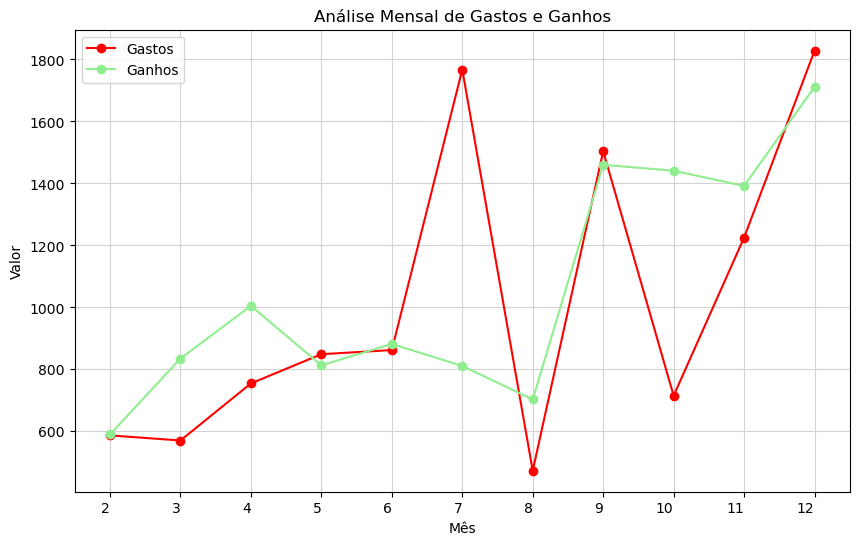

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(group['MÊS'], group['VALOR'], label='Gastos', marker='o', color = 'red')
plt.plot(group['MÊS'], group['GANHO'], label='Ganhos', marker='o', color = 'lightgreen')

plt.title('Análise Mensal de Gastos e Ganhos')
plt.xlabel('Mês')
plt.xticks(group['MÊS'], ha='right')
plt.ylabel('Valor')
plt.legend()
plt.grid(color = 'lightgray')
plt.show()